<a href="https://colab.research.google.com/github/georgezoto/Deep-Learning-with-PyTorch/blob/master/Introduction-to-PyTorch/4_Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Mount Google Drive for images and datasets ##

Using Colab, we need to mount our Google Drive in our virtual machine using an authorization code to access our images and train and test datasets.

- https://colab.research.google.com/notebooks/io.ipynb#scrollTo=RWSJpsyKqHjH

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

google_drive_path = '/content/gdrive/My Drive/+Colab Notebooks/Deep-Learning-with-PyTorch/Introduction-to-PyTorch'

import sys
sys.path.append(google_drive_path)

# Classifying Fashion-MNIST

Now it's your turn to build and train a neural network. You'll be using the [Fashion-MNIST dataset](https://github.com/zalandoresearch/fashion-mnist), a drop-in replacement for the MNIST dataset. MNIST is actually quite trivial with neural networks where you can easily achieve better than 97% accuracy. Fashion-MNIST is a set of 28x28 greyscale images of clothes. It's more complex than MNIST, so it's a better representation of the actual performance of your network, and a better representation of datasets you'll use in the real world.

<img src="https://docs.google.com/uc?export=download&id=17Tq56pA4TBq1qxcNebxg7rAQNYU29qpD" style="width:400px;height:300px;">

In this notebook, you'll build your own neural network. For the most part, you could just copy and paste the code from Part 3, but you wouldn't be learning. It's important for you to write the code yourself and get it to work. Feel free to consult the previous notebooks though as you work through this.

First off, let's load the dataset through torchvision.

In [2]:
import torch
from torchvision import datasets, transforms
import helper

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])
# Download and load the training data
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

  0%|          | 0/26421880 [00:00<?, ?it/s]

26427392it [00:00, 56945346.70it/s]                              


Extracting /root/.pytorch/F_MNIST_data/FashionMNIST/raw/train-images-idx3-ubyte.gz to /root/.pytorch/F_MNIST_data/FashionMNIST/raw


32768it [00:00, 489522.95it/s]
  1%|          | 49152/4422102 [00:00<00:08, 491029.94it/s]

Extracting /root/.pytorch/F_MNIST_data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to /root/.pytorch/F_MNIST_data/FashionMNIST/raw


4423680it [00:00, 20863563.06it/s]                           
8192it [00:00, 84333.07it/s]


Extracting /root/.pytorch/F_MNIST_data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to /root/.pytorch/F_MNIST_data/FashionMNIST/raw
Extracting /root/.pytorch/F_MNIST_data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to /root/.pytorch/F_MNIST_data/FashionMNIST/raw
Processing...
Done!


Here we can see one of the images.

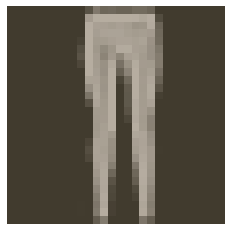

In [3]:
image, label = next(iter(trainloader))
helper.imshow(image[0,:]);



```
# This is formatted as code
```

## Building the network

Here you should define your network. As with MNIST, each image is 28x28 which is a total of 784 pixels, and there are 10 classes. You should include at least one hidden layer. We suggest you use ReLU activations for the layers and to return the logits or log-softmax from the forward pass. It's up to you how many layers you add and the size of those layers.

In [0]:
# TODO: Define your network architecture here
from torch import nn
from torch import optim
import math

#Model architectures
model_784_128_64_10 = nn.Sequential(nn.Linear(784, 128),
                      nn.ReLU(),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Linear(64, 10),
                      nn.LogSoftmax(dim=1))

In [230]:
model = model_784_128_64_10
model

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): LogSoftmax()
)

In [0]:
#Loss function
#criterion = nn.CrossEntropyLoss()
criterion = nn.NLLLoss()


#Optimizer updates the weights using their gradients
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Train the network

Now you should create your network and train it. First you'll want to define [the criterion](http://pytorch.org/docs/master/nn.html#loss-functions) ( something like `nn.CrossEntropyLoss`) and [the optimizer](http://pytorch.org/docs/master/optim.html) (typically `optim.SGD` or `optim.Adam`).

Then write the training code. Remember the training pass is a fairly straightforward process:

* Make a forward pass through the network to get the logits 
* Use the logits to calculate the loss
* Perform a backward pass through the network with `loss.backward()` to calculate the gradients
* Take a step with the optimizer to update the weights

By adjusting the hyperparameters (hidden units, learning rate, etc), you should be able to get the training loss below 0.4.

In [232]:
#Train the network
epochs = 3
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)

        # Clear the gradients, since gradients are accumulated!!!
        optimizer.zero_grad()

        # Forward pass, then backward pass, then update weights
        output = model(images)
        loss = criterion(output, labels)
        loss.backward()
        
        # Take an update step for the weights
        optimizer.step()

        running_loss += loss.item()
    else:
        print(f"Training loss: {running_loss/len(trainloader)}")

Training loss: 1.0397600027988714
Training loss: 0.5695767816640674
Training loss: 0.4967620900190715


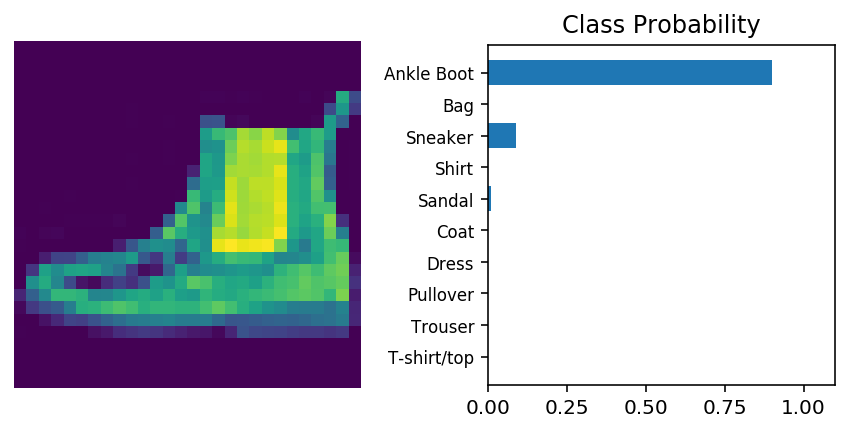

In [233]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import helper

# Test out your network!
dataiter = iter(testloader)
images, labels = dataiter.next()
img = images[0]
# Convert 2D image to 1D vector
img = img.resize_(1, 784)

# TODO: Calculate the class probabilities (softmax) for img

# Turn off gradients to speed up this part
with torch.no_grad():
    logps = model(img)

# Output of the network are log-probabilities, need to take exponential for probabilities
ps = torch.exp(logps)

# Plot the image and probabilities
helper.view_classify(img.resize_(1, 28, 28), ps, version='Fashion')

In [20]:
print(model)

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): LogSoftmax()
)


In [216]:
trainloader.dataset

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: /root/.pytorch/F_MNIST_data/
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.5,), std=(0.5,))
           )

In [217]:
testloader.dataset

Dataset FashionMNIST
    Number of datapoints: 10000
    Root location: /root/.pytorch/F_MNIST_data/
    Split: Test
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.5,), std=(0.5,))
           )

## Explore different network architectures

In [0]:
# https://discuss.pytorch.org/t/a-more-elegant-way-of-creating-the-nets-in-pytorch/11959/2
# https://pytorch.org/docs/stable/nn.html#torch.nn.Module.add_module
# https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html
# https://github.com/zalandoresearch/fashion-mnist

class sequential_model(nn.Sequential):

    def __init__(self, input_size = 784, output_size=10, hidden_layers=2, hidden_size=128, hidden_act='ReLU', output_act='LogSoftmax'):

        if not math.log(hidden_size, 2).is_integer():
          print('⚠️hidden_size needs to be a power of 2 ⚠️')
          return None

        if hidden_size < math.pow(2, hidden_layers):
          print('⚠️hidden_size needs to be a power of 2 and larger then %d ⚠️' % int(math.pow(2, hidden_layers)))
          return None
      
        super().__init__()

        if hidden_act == 'ReLU':
          act_text, activation = "ReLU", nn.ReLU()
        else:
          act_text, activation = "Sigmoid", nn.Sigmoid()

        if output_act == 'LogSoftmax':
          output_act_text, output_activation = "LogSoftmax", nn.LogSoftmax(dim=1)
        else:
          output_act_text, output_activation = "None", None

        for layer in range(hidden_layers+1):
          if layer == 0:
            self.add_module("Layer"+str(layer+1), nn.Linear(input_size, hidden_size))
            self.add_module(act_text+str(layer+1), activation)

          elif layer == hidden_layers:
            self.add_module("Layer"+str(layer+1), nn.Linear(hidden_size*2, output_size))
            if output_activation:
              self.add_module("LogSoftmax"+str(layer+1), output_activation)

          else:
            self.add_module("Layer"+str(layer+1), nn.Linear(hidden_size*2, hidden_size))
            self.add_module(act_text+str(layer+1), activation)

          hidden_size = int(hidden_size/2)

    def forward(self, V):
        return super().forward(V).squeeze()

    def train_model(self, criterion='NLLLoss', optimizer='SGD', learning_rate=0.01, epochs=3, train_data=trainloader):
      #Loss function
      #criterion = nn.CrossEntropyLoss()
      criterion = nn.NLLLoss()

      #Optimizer updates the weights using their gradients
      optimizer = optim.SGD(self.parameters(), lr=learning_rate)

      #Train the network
      #epochs = 3
      for e in range(epochs):
          running_loss = 0
          for images, labels in train_data:
              # Flatten MNIST images into a 784 long vector
              images = images.view(images.shape[0], -1)

              # Clear the gradients, since gradients are accumulated!!!
              optimizer.zero_grad()

              # Forward pass, then backward pass, then update weights
              output = self(images)
              loss = criterion(output, labels)
              loss.backward()
              
              # Take an update step for the weights
              optimizer.step()

              running_loss += loss.item()
          else:
              print(f"Training loss: {running_loss/len(trainloader)}")


    def test_model(self, test_data=testloader):
      dataiter = iter(test_data)
      images, labels = dataiter.next()
      img = images[0]
      # Convert 2D image to 1D vector
      img = img.resize_(1, 784)

      # Turn off gradients to speed up this part
      with torch.no_grad():
          logps = self(img)

      # Output of the network are log-probabilities, need to take exponential for probabilities
      ps = torch.exp(logps)

      # Plot the image and probabilities
      helper.view_classify(img.resize_(1, 28, 28), ps, version='Fashion')

    # https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html
    # Network performance on the whole dataset
    def test_model_accuracy(self, test_data=testloader):
      correct = 0
      total = 0

      # Turn off gradients to speed up this part
      with torch.no_grad():
          for images, labels in test_data:
              # Convert 2D image to 1D vector
              img = images.resize_(1, 784)

              #logps = self(img)
              #print('logps', logps, logps.sum())
              # Output of the network are log-probabilities, need to take exponential for probabilities
              #output = torch.exp(logps)

              output = self(img)
              
              _, predicted = torch.max(output.data, 0)
              total += labels.size(0)
              correct += (predicted == labels).sum().item()

      print('Accuracy of the network on the test images is %d / %d or %d%%' % (correct, total, (100 * correct / total)))

    # What are the classes that performed well, and the classes that did not perform well
    def test_model_accuracy_details(self, test_data=testloader):
      classes = ('0 T-shirt/top', '1 Trouser', '2 Pullover', '3 Dress', '4 Coat', '5 Sandal', '6 Shirt', '7 Sneaker', '8 Bag', '9 Ankle boot')

      class_correct = list(0. for i in range(10))
      class_total = list(0. for i in range(10))

      with torch.no_grad():
          for images, labels in test_data:
              # Convert 2D image to 1D vector
              img = images.resize_(1, 784)

              output = self(img)

              _, predicted = torch.max(output, 0)
              c = (predicted == labels).squeeze()
              for i in range(4):
                  label = labels[i]
                  class_correct[label] += c[i].item()
                  class_total[label] += 1


      for i in range(10):
          print('Accuracy of %5s : %2d %%' % (classes[i], 100 * class_correct[i] / class_total[i]))

## Model 1
## input_size = 784, output_size=10, hidden_layers=3, hidden_size=128 hidden_act='ReLU', output_act='LogSoftmax'

## criterion='NLLLoss', optimizer='SGD', learning_rate=0.01, epochs=3

In [381]:
model = sequential_model(input_size = 784, output_size=10, hidden_layers=3, hidden_size=128, hidden_act='ReLU', output_act='LogSoftmax')
print(model)

sequential_model(
  (Layer1): Linear(in_features=784, out_features=128, bias=True)
  (ReLU1): ReLU()
  (Layer2): Linear(in_features=128, out_features=64, bias=True)
  (ReLU2): ReLU()
  (Layer3): Linear(in_features=64, out_features=32, bias=True)
  (ReLU3): ReLU()
  (Layer4): Linear(in_features=32, out_features=10, bias=True)
  (LogSoftmax4): LogSoftmax()
)


In [382]:
model.train_model(criterion='NLLLoss', optimizer='SGD', learning_rate=0.01, epochs=3, train_data=trainloader)

Training loss: 1.4150462208399133
Training loss: 0.6796385029168017
Training loss: 0.5506251783513311


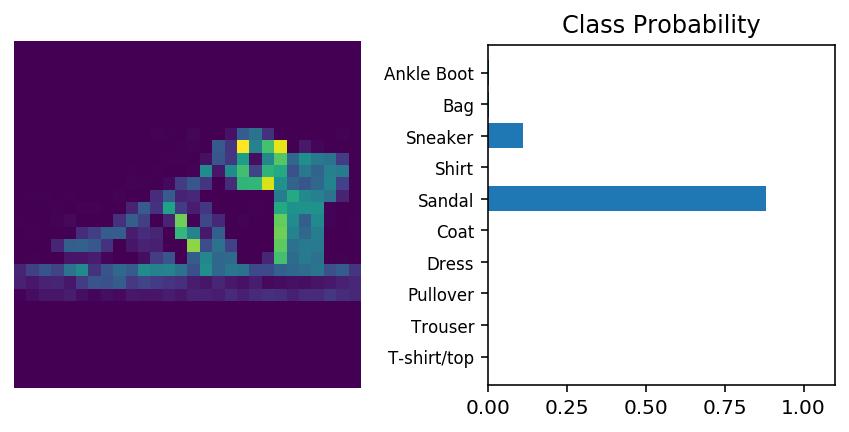

In [383]:
model.test_model(test_data=testloader)

In [384]:
model.train_model(criterion='NLLLoss', optimizer='SGD', learning_rate=0.01, epochs=5, train_data=trainloader)

Training loss: 0.48633149129622527
Training loss: 0.4528093824206766
Training loss: 0.42999677792159735
Training loss: 0.4126311837038252
Training loss: 0.3977310266385455


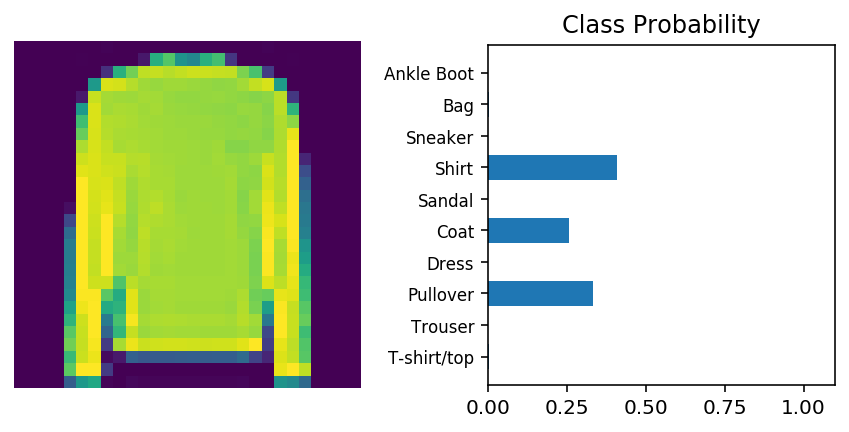

In [385]:
model.test_model(test_data=testloader)

In [386]:
model.test_model_accuracy(test_data=testloader)

Accuracy of the network on the test images is 1082 / 10000 or 10%


In [387]:
model.test_model_accuracy_details(test_data=testloader)

Accuracy of 0 T-shirt/top : 26 %
Accuracy of 1 Trouser : 28 %
Accuracy of 2 Pullover : 35 %
Accuracy of 3 Dress : 23 %
Accuracy of 4 Coat : 35 %
Accuracy of 5 Sandal : 21 %
Accuracy of 6 Shirt : 28 %
Accuracy of 7 Sneaker : 22 %
Accuracy of 8 Bag : 13 %
Accuracy of 9 Ankle boot : 39 %


## Model 2
## input_size = 784, output_size=10, hidden_layers=5, hidden_size=64, hidden_act='ReLU', output_act='LogSoftmax'

## criterion='NLLLoss', optimizer='SGD', learning_rate=0.01, epochs=3

In [388]:
model = sequential_model(input_size = 784, output_size=10, hidden_layers=5, hidden_size=64, hidden_act='ReLU', output_act='LogSoftmax')
print(model)

sequential_model(
  (Layer1): Linear(in_features=784, out_features=64, bias=True)
  (ReLU1): ReLU()
  (Layer2): Linear(in_features=64, out_features=32, bias=True)
  (ReLU2): ReLU()
  (Layer3): Linear(in_features=32, out_features=16, bias=True)
  (ReLU3): ReLU()
  (Layer4): Linear(in_features=16, out_features=8, bias=True)
  (ReLU4): ReLU()
  (Layer5): Linear(in_features=8, out_features=4, bias=True)
  (ReLU5): ReLU()
  (Layer6): Linear(in_features=4, out_features=10, bias=True)
  (LogSoftmax6): LogSoftmax()
)


In [389]:
model.train_model(criterion='NLLLoss', optimizer='SGD', learning_rate=0.01, epochs=3, train_data=trainloader)

Training loss: 2.2929932506862225
Training loss: 1.6554673640712747
Training loss: 0.8842596766600477


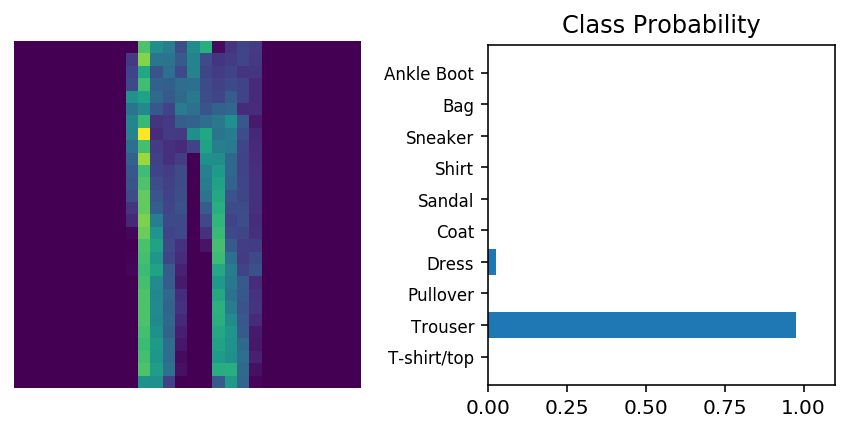

In [390]:
model.test_model(test_data=testloader)

In [391]:
model.test_model_accuracy(test_data=testloader)

Accuracy of the network on the test images is 1094 / 10000 or 10%


In [392]:
model.test_model_accuracy_details(test_data=testloader)

Accuracy of 0 T-shirt/top : 33 %
Accuracy of 1 Trouser : 24 %
Accuracy of 2 Pullover : 20 %
Accuracy of 3 Dress : 19 %
Accuracy of 4 Coat : 36 %
Accuracy of 5 Sandal : 28 %
Accuracy of 6 Shirt :  0 %
Accuracy of 7 Sneaker : 37 %
Accuracy of 8 Bag : 20 %
Accuracy of 9 Ankle boot : 34 %


## Model 3
## input_size = 784, output_size=10, hidden_layers=5, hidden_size=64, hidden_act='ReLU', output_act='LogSoftmax'

## criterion='NLLLoss', optimizer='SGD', learning_rate=0.1, epochs=5

In [393]:
model = sequential_model(input_size = 784, output_size=10, hidden_layers=5, hidden_size=64, hidden_act='ReLU', output_act='LogSoftmax')
print(model)

sequential_model(
  (Layer1): Linear(in_features=784, out_features=64, bias=True)
  (ReLU1): ReLU()
  (Layer2): Linear(in_features=64, out_features=32, bias=True)
  (ReLU2): ReLU()
  (Layer3): Linear(in_features=32, out_features=16, bias=True)
  (ReLU3): ReLU()
  (Layer4): Linear(in_features=16, out_features=8, bias=True)
  (ReLU4): ReLU()
  (Layer5): Linear(in_features=8, out_features=4, bias=True)
  (ReLU5): ReLU()
  (Layer6): Linear(in_features=4, out_features=10, bias=True)
  (LogSoftmax6): LogSoftmax()
)


In [394]:
model.train_model(criterion='NLLLoss', optimizer='SGD', learning_rate=0.1, epochs=5, train_data=trainloader)

Training loss: 1.3123882921265642
Training loss: 0.6953766518818544
Training loss: 0.5612423288574351
Training loss: 0.4951849173921258
Training loss: 0.43248581873582626


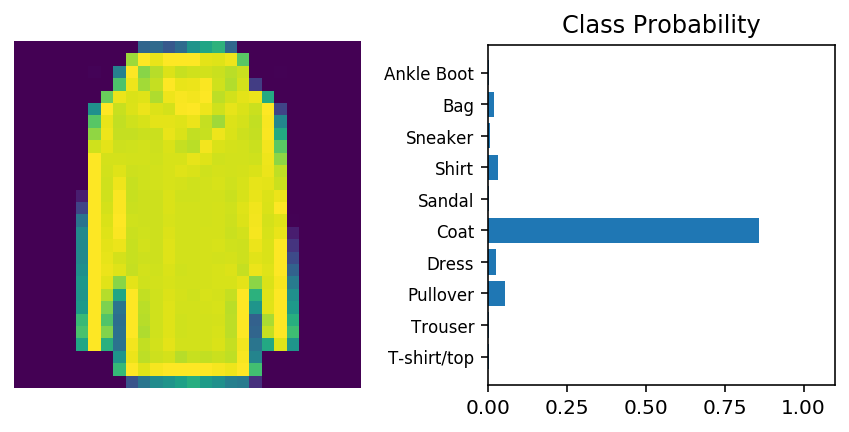

In [395]:
model.test_model(test_data=testloader)

In [396]:
model.test_model_accuracy(test_data=testloader)

Accuracy of the network on the test images is 1140 / 10000 or 11%


In [397]:
model.test_model_accuracy_details(test_data=testloader)

Accuracy of 0 T-shirt/top : 23 %
Accuracy of 1 Trouser : 29 %
Accuracy of 2 Pullover : 18 %
Accuracy of 3 Dress : 29 %
Accuracy of 4 Coat : 19 %
Accuracy of 5 Sandal : 35 %
Accuracy of 6 Shirt : 17 %
Accuracy of 7 Sneaker : 28 %
Accuracy of 8 Bag : 32 %
Accuracy of 9 Ankle boot : 32 %


## Model 4
## input_size = 784, output_size=10, hidden_layers=3, hidden_size=256, hidden_act='ReLU', output_act='LogSoftmax'

## criterion='NLLLoss', optimizer='SGD', learning_rate=0.01, epochs=3

In [398]:
model = sequential_model(input_size = 784, output_size=10, hidden_layers=3, hidden_size=256, hidden_act='ReLU', output_act='LogSoftmax')
print(model)

sequential_model(
  (Layer1): Linear(in_features=784, out_features=256, bias=True)
  (ReLU1): ReLU()
  (Layer2): Linear(in_features=256, out_features=128, bias=True)
  (ReLU2): ReLU()
  (Layer3): Linear(in_features=128, out_features=64, bias=True)
  (ReLU3): ReLU()
  (Layer4): Linear(in_features=64, out_features=10, bias=True)
  (LogSoftmax4): LogSoftmax()
)


In [399]:
model.train_model(criterion='NLLLoss', optimizer='SGD', learning_rate=0.01, epochs=3, train_data=trainloader)

Training loss: 1.2725210364566428
Training loss: 0.632513445132831
Training loss: 0.5378980459943254


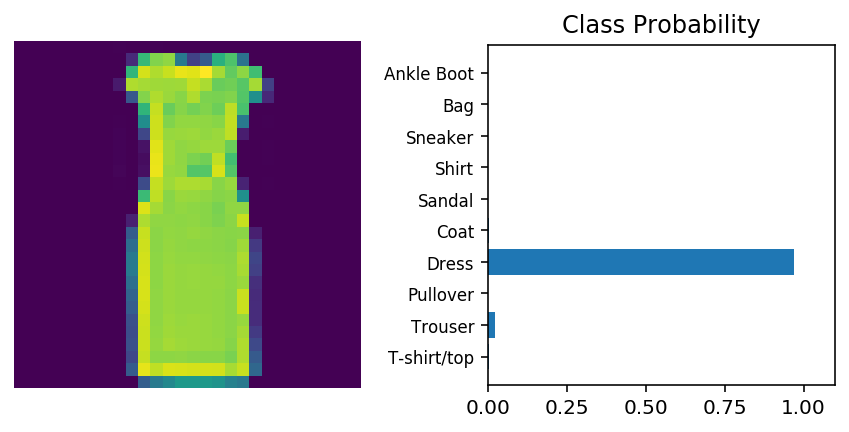

In [400]:
model.test_model(test_data=testloader)

In [401]:
model.test_model_accuracy(test_data=testloader)

Accuracy of the network on the test images is 1152 / 10000 or 11%


In [402]:
model.test_model_accuracy_details(test_data=testloader)

Accuracy of 0 T-shirt/top : 20 %
Accuracy of 1 Trouser : 34 %
Accuracy of 2 Pullover : 19 %
Accuracy of 3 Dress : 21 %
Accuracy of 4 Coat : 30 %
Accuracy of 5 Sandal : 41 %
Accuracy of 6 Shirt : 17 %
Accuracy of 7 Sneaker : 28 %
Accuracy of 8 Bag : 27 %
Accuracy of 9 Ankle boot : 37 %
